<center>

## Teleco Telecom User Overview Analysis
</center>

#### Import necessery liberary

In [43]:
import os
import sys
import pandas as pd
import numpy as np

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


In [44]:
from DB_connection.connection import PostgresConnection
from src.data_quality_check import DataQualityCheck
from scripts.overview_analyser import UserOverviewAnalysis

In [45]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [46]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [47]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [48]:
df.shape

(150001, 55)

In [49]:
dq=DataQualityCheck(df)

In [50]:
# checking for missing value in each columns that have more than 0 %
dq.check_missing_data(df)

,Feature,Missing in %
0,Nb of sec with 37500B < Vol UL,87
1,Nb of sec with 6250B < Vol UL < 37500B,75
2,Nb of sec with 125000B < Vol DL,65
3,TCP UL Retrans. Vol (Bytes),64
4,Nb of sec with 31250B < Vol DL < 125000B,62
5,Nb of sec with 1250B < Vol UL < 6250B,62
6,Nb of sec with 6250B < Vol DL < 31250B,59
7,TCP DL Retrans. Vol (Bytes),59
8,HTTP UL (Bytes),55
9,HTTP DL (Bytes),54


In [51]:
dq.check_duplicate_data(df)

'Success: No duplicate data!'

### Expolatory Data Analysis

In [52]:
# Display data types of all columns
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [53]:
df.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,149010,150000,150000,150000,150000,150000,149431,148935,149429,148848,...,150001,150001,150001,150001,150001,150001,150001,150001,150000,150000
unique,NaN,9997,NaN,6403,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/26/2019 7:25,NaN,4/25/2019 0:01,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,203,NaN,1150,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10138874654256340992,NaN,499,NaN,499,104609,208201639651669,41882819545,48474547977655,NaN,...,11634073,11009410,11626852,11001755,422044703,8288398,421100544,8264799,41121206,454643430
std,2893172512268410880,NaN,289,NaN,288,81038,21488090841,2447443358622,22416372027958,NaN,...,6710569,6345423,6725218,6359490,243967494,4782700,243205010,4769004,11276387,244142874
min,6917537518543529984,NaN,0,NaN,0,7142,204047108489451,33601001722,440015202000,NaN,...,53,105,42,35,2516,59,3290,148,2866892,7114041
25%,7349883246953990144,NaN,250,NaN,251,57440,208201401263249,33651295582,35460708865439,NaN,...,5833501,5517965,5777156,5475981,210473253,4128476,210186872,4145943,33222010,243106803
50%,7349883264156584960,NaN,499,NaN,500,86399,208201546329113,33663706799,35722009426311,NaN,...,11616019,11013447,11642217,10996384,423408104,8291208,421803006,8267071,41143312,455841078
75%,13042425978957576192,NaN,749,NaN,750,132430,208201771619103,33683490769,86119704674953,NaN,...,17448518,16515562,17470478,16507268,633174167,12431624,631691786,12384148,49034238,665705544


In [54]:
# Adjust pandas settings to display full precision for floats
pd.set_option('display.float_format', '{:.0f}'.format)  # No scientific notation

In [55]:
eda=UserOverviewAnalysis(df)
eda.top_10_handsets(df)

Top 10 Handsets Used by Customers:


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


Top 3 Handset Manufacturers:


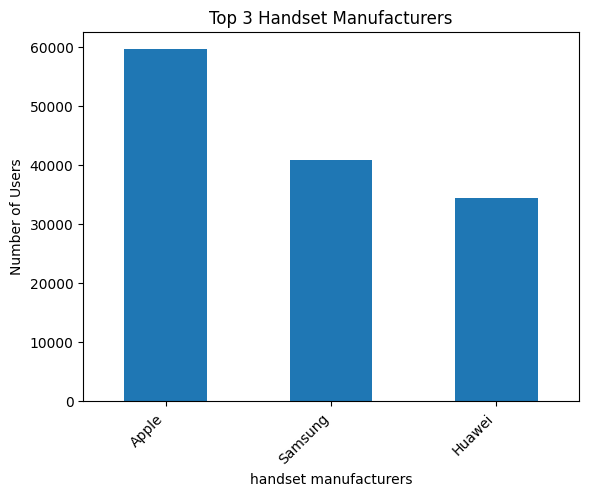

In [56]:
# Get the top 3 manufacturers
import matplotlib.pyplot as plt
eda.top_3_handset_manufacturers(df).plot(kind='bar')
plt.title(f'Top 3 Handset Manufacturers')
plt.xlabel('handset manufacturers')
plt.ylabel('Number of Users')
plt.xticks(rotation=45,ha='right')
plt.show()

In [57]:
eda.top_5_handsets_per_manufacturer(df)

Top 3 Handset Manufacturers:


IndexingError: Too many indexers

Top 3 Handset Manufacturers:
Top 5 Handsets per Top 3 Manufacturer:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


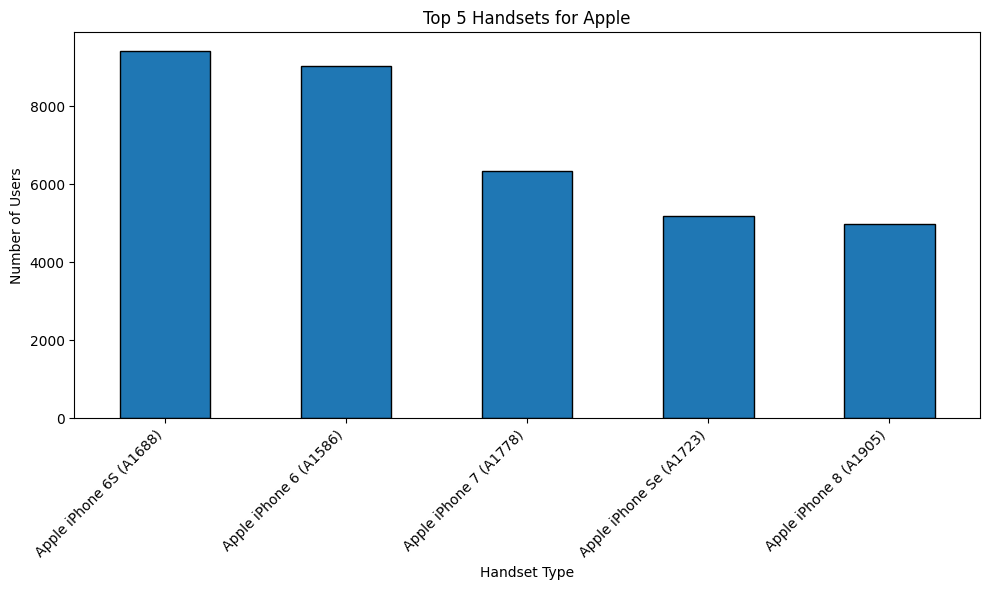

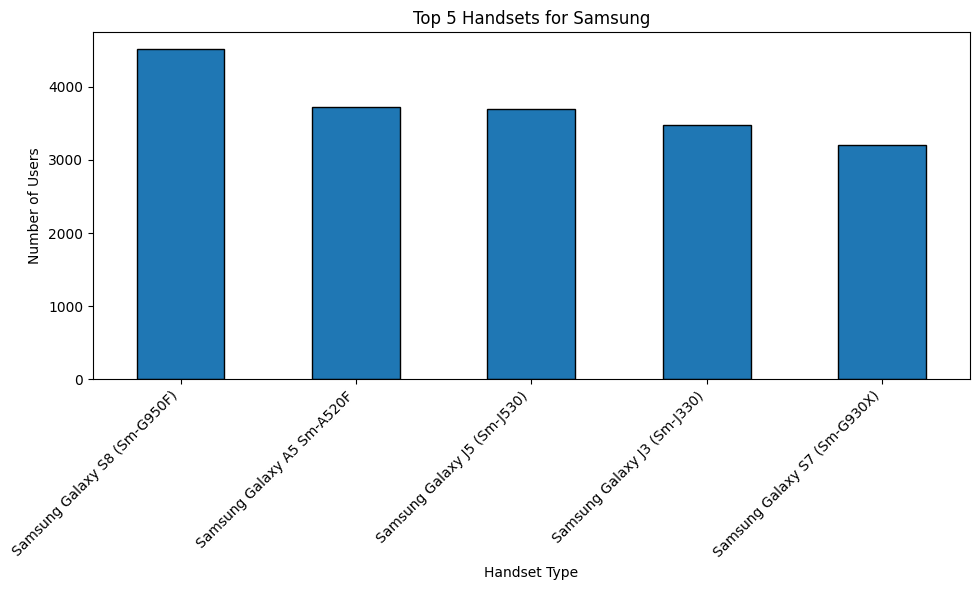

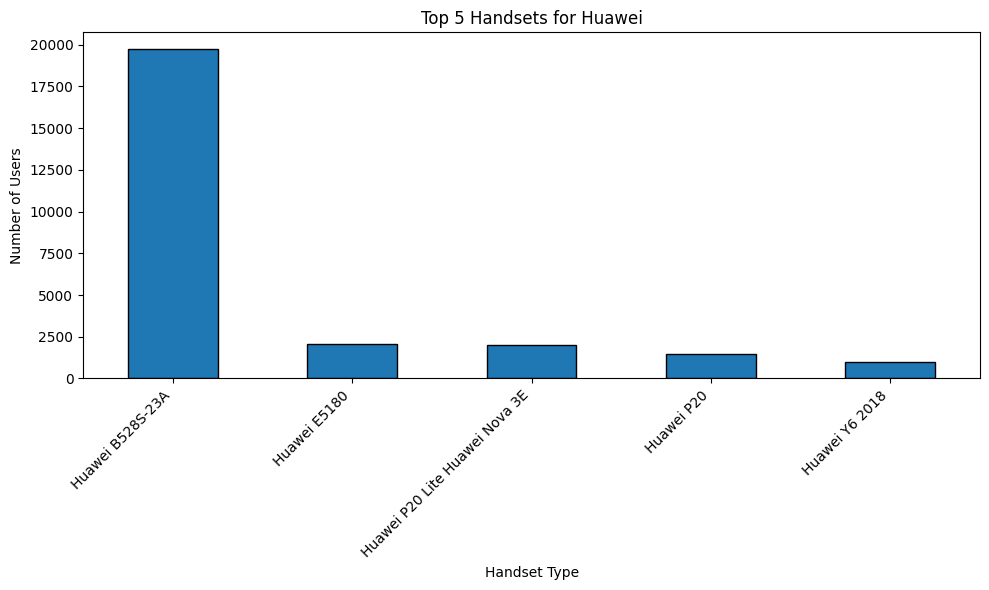

In [ ]:
eda.plot_top_5_handsets_per_top_3_manufacturer(df)

## Interpretation and Recommendations
##### 1. Identify key handsets and manufacturers for targeted marketing.
##### 2. Focus on top applications for potential partnerships or promotions.
##### 3. Address high data usage segments with special plans or offers.
##### 4. Use correlation insights to bundle services effectively.

In [58]:
# Aggregate the required information per user (MSISDN/Number)
user_overview = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),  # Count unique xDR sessions (assuming 'Bearer Id' represents sessions)
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum of session durations
    total_download_data=('Total DL (Bytes)', 'sum'),  # Total download data
    total_upload_data=('Total UL (Bytes)', 'sum'),  # Total upload data
    total_data_volume_social_media=('Social Media DL (Bytes)', 'sum'),  # Total Social Media download volume
    total_data_volume_google=('Google DL (Bytes)', 'sum'),  # Total Google download volume
    total_data_volume_email=('Email DL (Bytes)', 'sum'),  # Total Email download volume
    total_data_volume_youtube=('Youtube DL (Bytes)', 'sum'),  # Total YouTube download volume
    total_data_volume_netflix=('Netflix DL (Bytes)', 'sum'),  # Total Netflix download volume
    total_data_volume_gaming=('Gaming DL (Bytes)', 'sum'),  # Total Gaming download volume
    total_data_volume_other=('Other DL (Bytes)', 'sum')  # Total Other download volume
).reset_index()

# Display the result
print("User Overview:")
user_overview.head()

User Overview:


,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume_social_media,total_data_volume_google,total_data_volume_email,total_data_volume_youtube,total_data_volume_netflix,total_data_volume_gaming,total_data_volume_other
0,33601001722,1,116720,842637466,36053108,2206504,3337123,837400,14900201,10265105,811091133,377096990
1,33601001754,1,181230,120755184,36104459,2598548,4197697,2828821,5324251,770569,105035298,279557701
2,33601002511,1,134969,556659663,39306820,3148004,3343483,2436500,2137272,16525919,529068485,495086501
3,33601007832,1,49878,401993172,20327526,251469,5937765,2178618,4393123,1157362,388074835,25248001
4,33601008617,2,37104,1363130417,94280527,2861230,13728668,2247808,10339971,24971647,1308981093,777643713


In [59]:
user_overview.shape

(106856, 12)

In [60]:
user_overview.isnull().sum()

MSISDN/Number                     0
number_of_xDR_sessions            0
total_session_duration            0
total_download_data               0
total_upload_data                 0
total_data_volume_social_media    0
total_data_volume_google          0
total_data_volume_email           0
total_data_volume_youtube         0
total_data_volume_netflix         0
total_data_volume_gaming          0
total_data_volume_other           0
dtype: int64

In [61]:
# Create a new column for Total Duration
df['Total Duration'] = df['Dur. (ms)']

# Compute total data (DL + UL)
df['Total Data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Segment users into decile classes based on total duration
df['Decile'] = pd.qcut(df['Total Duration'], 5, labels=False)

# Compute the total data per decile class
total_data_per_decile = df.groupby('Decile')['Total Data'].sum().reset_index()

print("Total data per decile class:")
print(total_data_per_decile)


Total data per decile class:
   Decile     Total Data
0       0 14883571142378
1       1 23620445651290
2       2  6087404151620
3       3 14854932911954
4       4 14918341598419


### Task 1.2

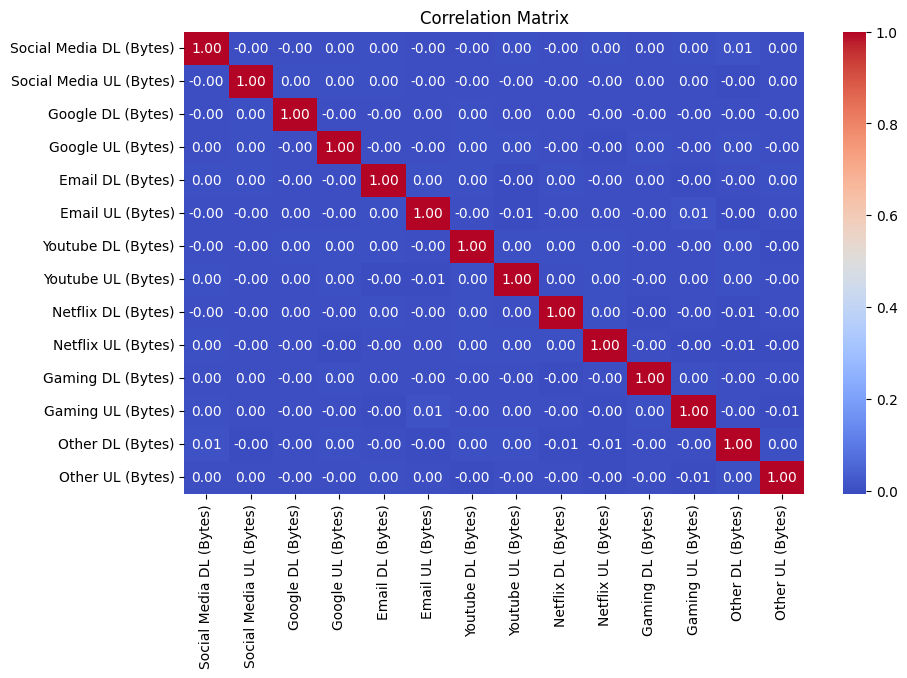

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
# Bivariate Analysis - Correlations
correlation_matrix = df[[
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

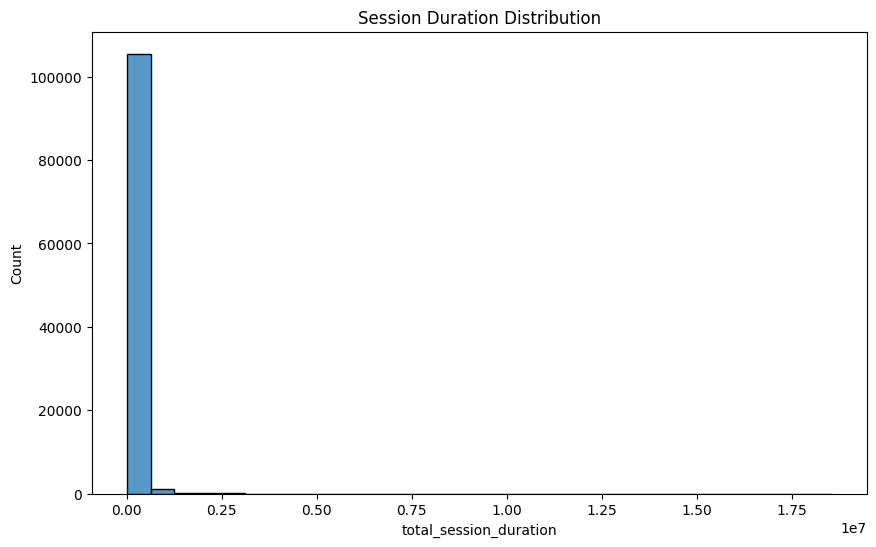

In [65]:
# Non-Graphical Univariate Analysis
duration_variance = df['total_session_duration'].var()
duration_std = df['total_session_duration'].std()

# Graphical Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['total_session_duration'], bins=30)
plt.title('Session Duration Distribution')
plt.show()